In [1]:
# importing all needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
# getting the information needed from yahoo finance
# this includes Apple and Amazon's stock shares

apple_data = yf.download("AAPL", start='2012-1-1', end="2022-1-1")
amazon_data = yf.download("AMZN", start='2012-1-1', end="2022-1-1")



apple_data.to_csv("apple.csv")
amazon_data.to_csv("amazon.csv")


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [3]:
# getting daily data on 'business days only' in both time series
apple_data = apple_data.asfreq('b')
amazon_data = amazon_data.asfreq('b')

# dealing with the NaN
# we will use linear interpolation becuase it estimates the values based on near values
apple_data = apple_data.interpolate()
amazon_data = amazon_data.interpolate()


In [4]:
# re-indexing both time series to match the same time periods
common_date_range = apple_data.index.union(amazon_data.index)
apple_data = apple_data.reindex(common_date_range)
amazon_data = amazon_data.reindex(common_date_range)

In [5]:
# we will only analyze the Close column of each dataset, so we modify our dataframes
apple = apple_data["Close"]
amazon = amazon_data["Close"]

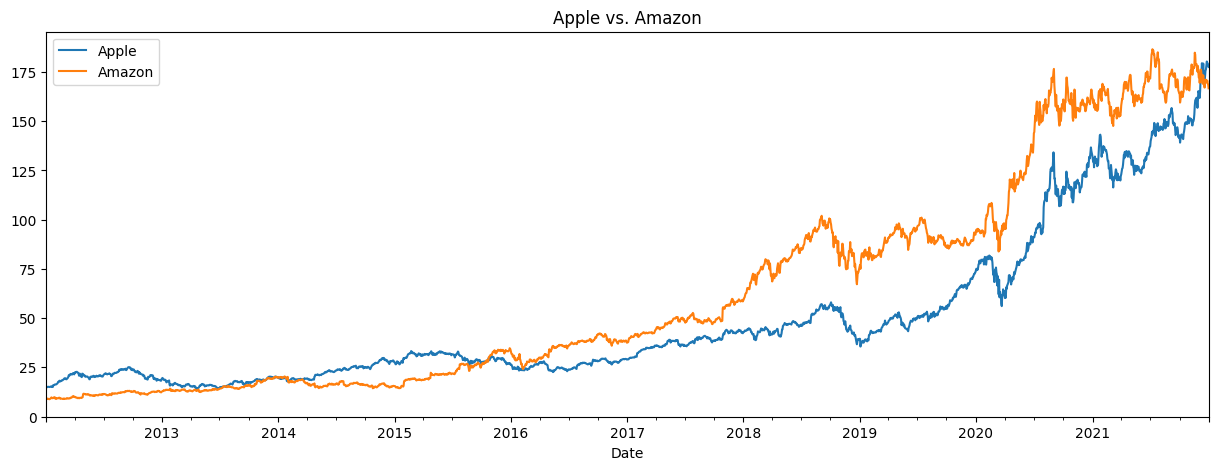

In [28]:
apple.plot(figsize=(15,5), label = "Apple")
amazon.plot(figsize=(15,5), label = "Amazon")
plt.title("Apple vs. Amazon")
plt.legend()
plt.show()

In [7]:
# Data Normalization
# we will use Z-score normalization for this data becuase we're using the financial data of two companies to predict their future performance
# this method scales the data to have zero mean and unit variance.
apple_data_normalized = (apple_data - apple_data.mean()) / apple_data.std()
amazon_data_normalized = (amazon_data - amazon_data.mean()) / amazon_data.std()


In [8]:
# Stationarity Transformation by differencing normalized data
apple_data_diff = apple_data_normalized.diff()
amazon_data_diff = amazon_data_normalized.diff()

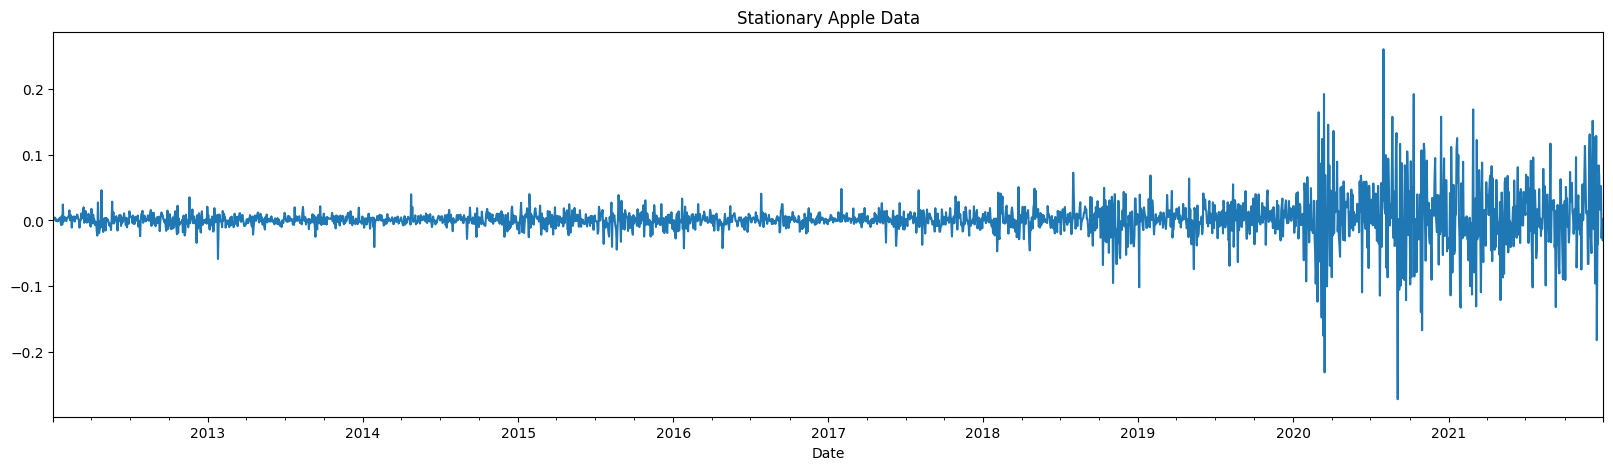

In [9]:
apple_data_diff.Close.plot(figsize=(20,5))
plt.title("Stationary Apple Data")
plt.show()

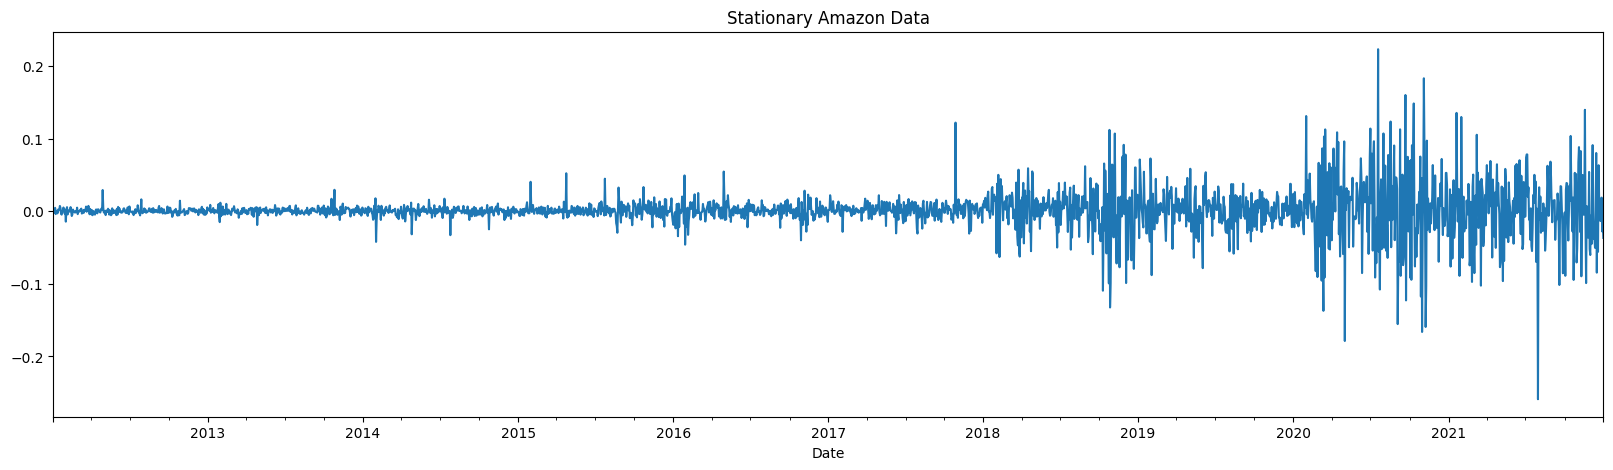

In [10]:
amazon_data_diff.Close.plot(figsize=(20,5))
plt.title("Stationary Amazon Data")
plt.show()

In [11]:
# analyzing trends

def plot_moving_average(data, name, window_size=30,window_size2=60):
    # Compute the moving average
    data['MA'] = data['Close'].rolling(window=window_size).mean()
    data['MA2'] = data['Close'].rolling(window=window_size2).mean()

    # Plot the original 'Close' prices and the moving average
    plt.figure(figsize=(12, 6))
    plt.plot(data.index, data['Close'], label='Original')
    plt.plot(data.index, data['MA'], label=f'{window_size}-day Moving Average')
    plt.plot(data.index, data['MA2'], label=f'{window_size2}-day Moving Average')
    plt.title(f'{name} Close Prices with Moving Average')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.legend()

    # # Usage:
    # # Identify potential buy or sell signals
    # buy_signals = data[data['Close'] < data['MA']]
    # sell_signals = data[data['Close'] > data['MA']]

    # # Plot buy signals
    # plt.scatter(buy_signals.index, buy_signals['Close'], color='green', s=50, label='Buy')

    # # Plot sell signals
    # plt.scatter(sell_signals.index, sell_signals['Close'], color='red', s=50, label='Sell')

    # plt.legend()
    plt.show()



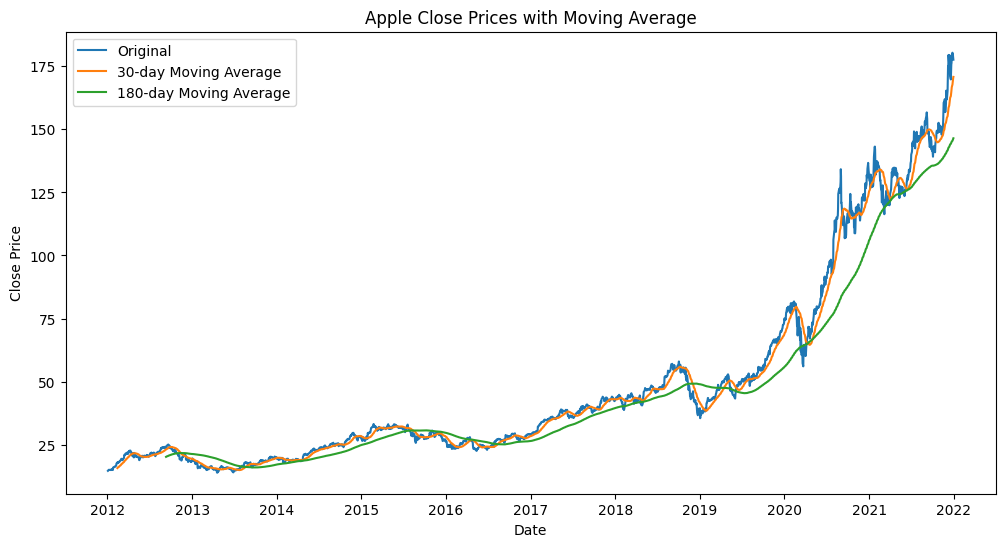

In [12]:
plot_moving_average(apple_data, "Apple",30,180)

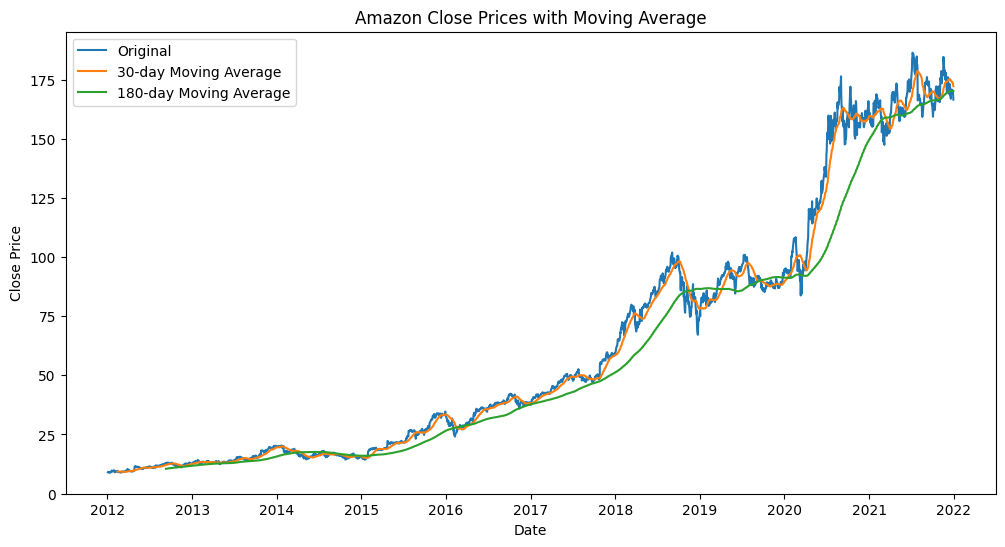

In [13]:
plot_moving_average(amazon_data, "Amazon", 30,180)

In [14]:
# analyzing seasonality
def plot_seasonality(data, name):
    # Extract the month and year from the index
    # data.index = pd.to_datetime(data.index)

    data['Month'] = data.index.month
    data['Year'] = data.index.year

    # Calculate the average closing price by month and year
    average_price = data.groupby(['Month', 'Year'])['Close'].mean()

    # Reshape the data for plotting
    average_price = average_price.unstack()

    # Plot the seasonality pattern
    average_price.plot(figsize=(15,10))
    plt.title(f'Seasonality Analysis of {name} Close Prices')
    plt.xlabel('Months of each Year')
    plt.ylabel('Average Close Price')
    plt.xticks(np.arange(1,13))
    plt.legend(title='Year', loc = 'upper left')
    plt.show()


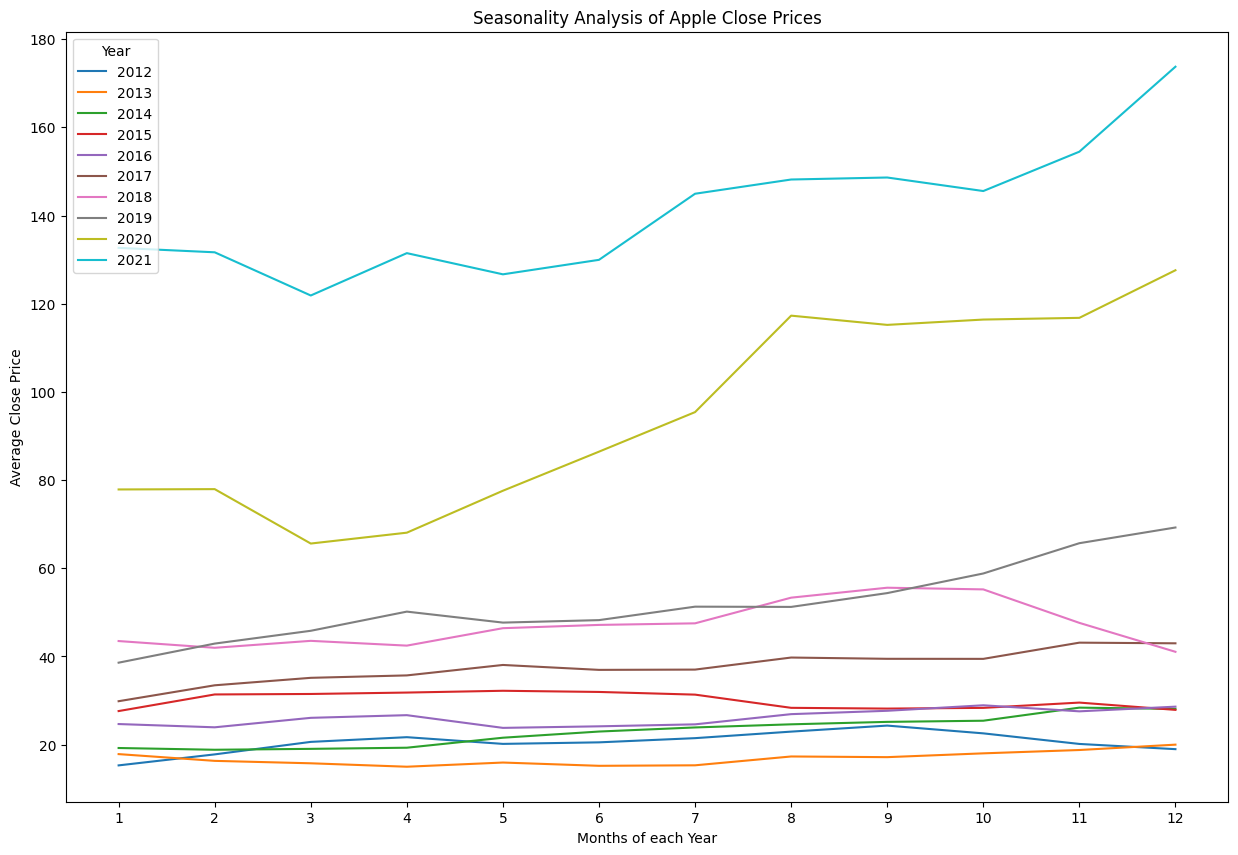

In [15]:
plot_seasonality(apple_data, "Apple")
# apple_data

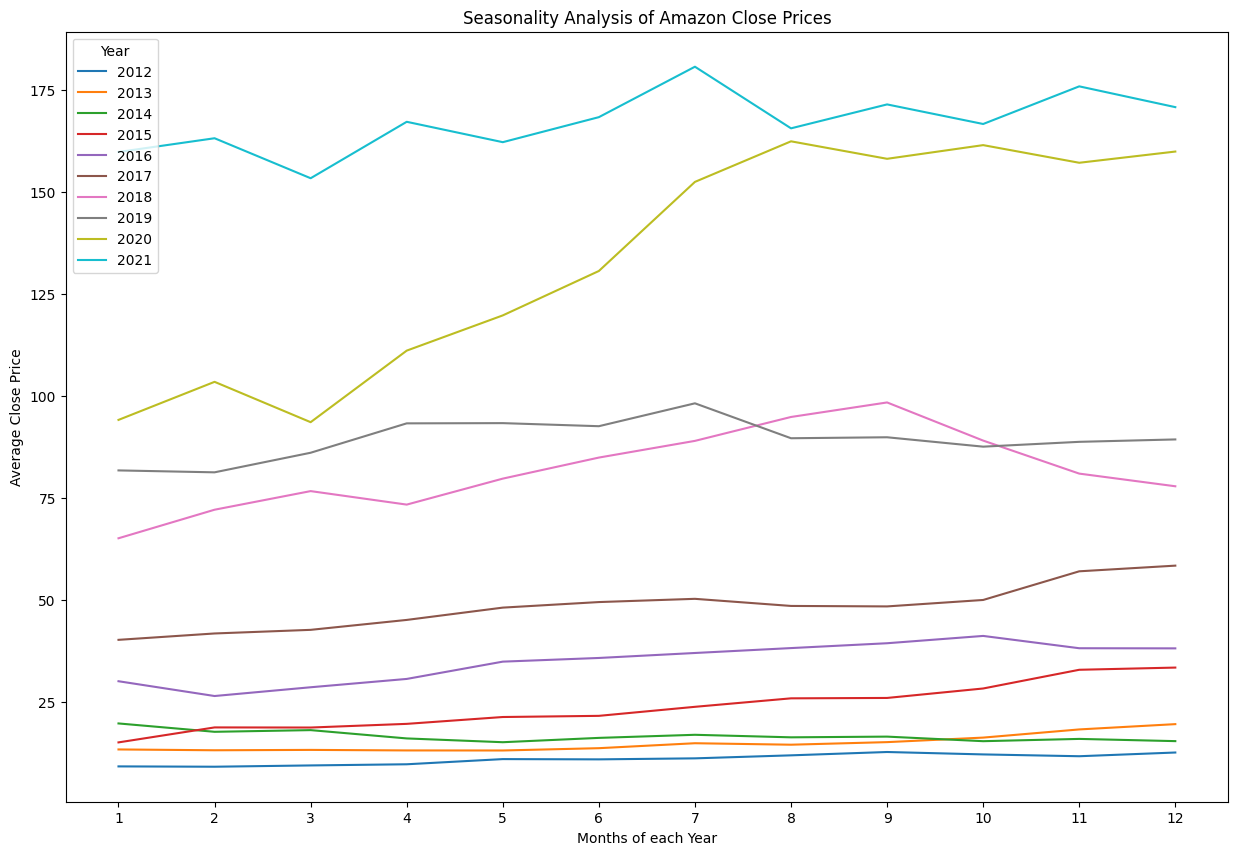

In [16]:
plot_seasonality(amazon_data, "Amazon")

In [17]:
# Descriptive statistics
# mean
print(apple_data.describe().mean(), 2*"\n", amazon_data.describe().mean())

Open         3.751991e+02
High         3.756584e+02
Low          3.745948e+02
Close        3.751107e+02
Adj Close    3.734837e+02
Volume       3.067956e+08
MA           3.701331e+02
MA2          3.471692e+02
Month        3.316214e+02
Year         1.838922e+03
dtype: float64 

 Open         3.836106e+02
High         3.841108e+02
Low          3.829716e+02
Close        3.835329e+02
Adj Close    3.835329e+02
Volume       1.044682e+08
MA           3.788893e+02
MA2          3.584261e+02
Month        3.316214e+02
Year         1.838922e+03
dtype: float64


In [18]:
# median
print(apple_data.describe().median(), 2*"\n", amazon_data.describe().median())

Open         4.383478e+01
High         4.432275e+01
Low          4.336598e+01
Close        4.386891e+01
Adj Close    4.293267e+01
Volume       1.629021e+08
MA           4.305555e+01
MA2          3.985143e+01
Month        6.761020e+00
Year         2.016751e+03
dtype: float64 

 Open         5.745394e+01
High         5.806584e+01
Low          5.678410e+01
Close        5.743153e+01
Adj Close    5.743153e+01
Volume       6.137100e+07
MA           5.698922e+01
MA2          5.443089e+01
Month        6.761020e+00
Year         2.016751e+03
dtype: float64


In [19]:
# variance
print(apple_data.describe().var(), 2*"\n", amazon_data.describe().var())

Open         8.174422e+05
High         8.171302e+05
Low          8.178000e+05
Close        8.174770e+05
Adj Close    8.186813e+05
Volume       2.424104e+17
MA           7.997122e+05
MA2          7.099501e+05
Month        8.467805e+05
Year         5.933617e+05
dtype: float64 

 Open         8.116725e+05
High         8.113563e+05
Low          8.120585e+05
Close        8.117066e+05
Adj Close    8.117066e+05
Volume       2.364886e+16
MA           7.938488e+05
MA2          7.031779e+05
Month        8.467805e+05
Year         5.933617e+05
dtype: float64


In [20]:
# std
print(apple_data.describe().std(), 2*"\n", amazon_data.describe().std())

Open         9.041251e+02
High         9.039525e+02
Low          9.043229e+02
Close        9.041444e+02
Adj Close    9.048101e+02
Volume       4.923519e+08
MA           8.942663e+02
MA2          8.425854e+02
Month        9.202068e+02
Year         7.702998e+02
dtype: float64 

 Open         9.009287e+02
High         9.007532e+02
Low          9.011429e+02
Close        9.009476e+02
Adj Close    9.009476e+02
Volume       1.537819e+08
MA           8.909819e+02
MA2          8.385571e+02
Month        9.202068e+02
Year         7.702998e+02
dtype: float64


In [21]:
# calculating the correlation coefficient
print("Apple")
print(apple_data.corr())
print()
print("Amazon")
print(amazon_data.corr())

Apple
               Open      High       Low     Close  Adj Close    Volume  \
Open       1.000000  0.999888  0.999842  0.999726   0.999660 -0.415943   
High       0.999888  1.000000  0.999801  0.999856   0.999794 -0.413959   
Low        0.999842  0.999801  1.000000  0.999861   0.999801 -0.419005   
Close      0.999726  0.999856  0.999861  1.000000   0.999936 -0.416696   
Adj Close  0.999660  0.999794  0.999801  0.999936   1.000000 -0.420239   
Volume    -0.415943 -0.413959 -0.419005 -0.416696  -0.420239  1.000000   
MA         0.996478  0.996583  0.996290  0.996337   0.996416 -0.411274   
MA2        0.985558  0.985478  0.985930  0.985660   0.986138 -0.399352   
Month      0.135222  0.134901  0.135597  0.135285   0.134149 -0.109442   
Year       0.827607  0.827743  0.827970  0.827890   0.832200 -0.656637   

                 MA       MA2     Month      Year  
Open       0.996478  0.985558  0.135222  0.827607  
High       0.996583  0.985478  0.134901  0.827743  
Low        0.996290  0.

In [22]:
# cross-correlation between two time series
result = apple_data.corrwith(amazon_data)["Close"]
result

0.9524837678864877